<a href="https://colab.research.google.com/github/swatipc/DeepLearning/blob/master/DL_UngradedAssignment_0_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
# Import files
import io
from google.colab import files
iris = files.upload()

Saving Iris.csv to Iris (1).csv


In [0]:
iris_data = pd.read_csv(io.BytesIO(iris['Iris.csv']))

In [0]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
iris_data["Species"].value_counts()

KeyError: ignored

In [0]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Saving figure attribute_histogram_plots


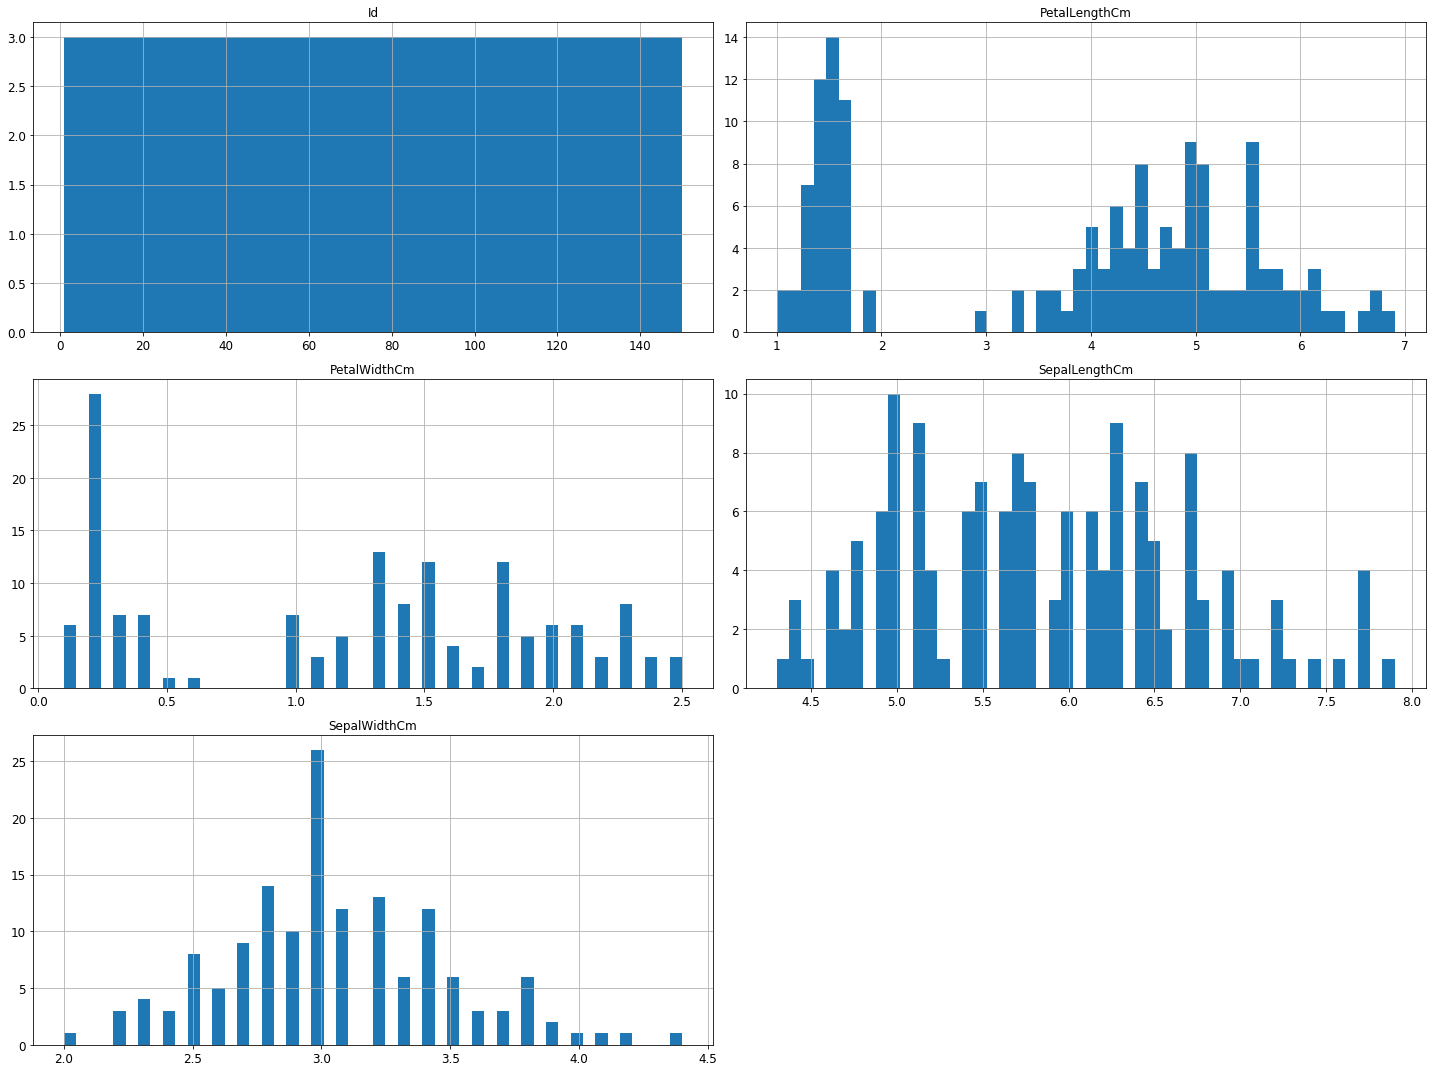

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
iris_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
# To make this notebook's output identical
np.random.seed(42)

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
train_set, test_set = split_train_test(iris_data, 0.2)
len(train_set)

120

In [0]:
len(test_set)

30

In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
iris_with_id = iris_data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(iris_with_id, 0.2, "index")

In [0]:
iris_with_id["id"] = iris_data["PetalLengthCm"] * 1000 + iris_data["PetalWidthCm"]
train_set, test_set = split_train_test_by_id(iris_with_id, 0.2, "id")

In [0]:
test_set.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,id
13,13,14,4.3,3.0,1.1,0.1,Iris-setosa,1100.1
14,14,15,5.8,4.0,1.2,0.2,Iris-setosa,1200.2
24,24,25,4.8,3.4,1.9,0.2,Iris-setosa,1900.2
35,35,36,5.0,3.2,1.2,0.2,Iris-setosa,1200.2
44,44,45,5.1,3.8,1.9,0.4,Iris-setosa,1900.4


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_data, test_size=0.2, random_state=42)

In [0]:
test_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


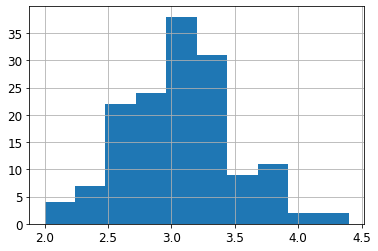

In [0]:
iris_data["SepalWidthCm"].hist()

In [0]:
iris_data["SepalWidth_cat"] = pd.cut(iris_data["SepalWidthCm"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [0]:
iris_data["SepalWidth_cat"].value_counts()

2    83
3    67
5     0
4     0
1     0
Name: SepalWidth_cat, dtype: int64

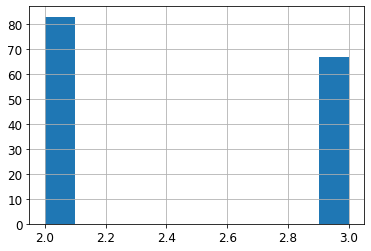

In [0]:
iris_data["SepalWidth_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris_data, iris_data["SepalWidth_cat"]):
    strat_train_set = iris_data.loc[train_index]
    strat_test_set = iris_data.loc[test_index]

In [0]:
strat_test_set["SepalWidth_cat"].value_counts() / len(strat_test_set)

2    0.566667
3    0.433333
5    0.000000
4    0.000000
1    0.000000
Name: SepalWidth_cat, dtype: float64

In [0]:
iris_data["SepalWidth_cat"].value_counts() / len(iris_data)

2    0.553333
3    0.446667
5    0.000000
4    0.000000
1    0.000000
Name: SepalWidth_cat, dtype: float64

In [0]:
def SepalWidth_cat_proportions(data):
    return data["SepalWidth_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(iris_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": SepalWidth_cat_proportions(iris_data),
    "Stratified": SepalWidth_cat_proportions(strat_test_set),
    "Random": SepalWidth_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [0]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.553333,0.566667,0.566667,2.409639,2.409639
3,0.446667,0.433333,0.433333,-2.985075,-2.985075
4,0.000000,0.000000,0.000000,NaN,NaN
5,0.000000,0.000000,0.000000,NaN,NaN


In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("SepalWidth_cat", axis=1, inplace=True)

In [0]:
#Discover and visualize the data to gain insights

In [0]:
iris_data = strat_train_set.copy()

Saving figure bad_visualization_plot


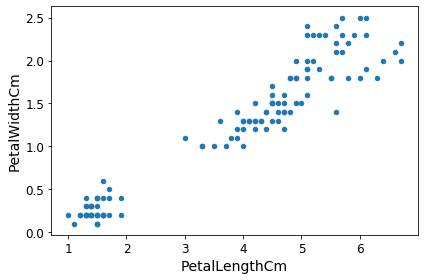

In [0]:
iris_data.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


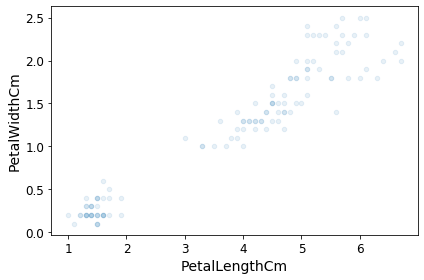

In [0]:
iris_data.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", alpha=0.1)
save_fig("better_visualization_plot")

In [0]:
corr_matrix = iris_data.corr()

In [0]:
corr_matrix["SepalWidthCm"].sort_values(ascending=False)

SepalWidthCm     1.000000
SepalLengthCm   -0.072262
PetalWidthCm    -0.320131
Id              -0.388518
PetalLengthCm   -0.389033
Name: SepalWidthCm, dtype: float64

In [0]:
#Prepare the data for Machine Learning algorithms

In [0]:
iris_features = strat_train_set.drop("Species", axis=1) # drop labels for training set
iris_labels = strat_train_set["Species"].copy()

In [0]:
sample_incomplete_rows = iris_data[iris_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
iris_num = iris_data.select_dtypes(include=[np.number])
imputer.fit(iris_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([78.  ,  5.75,  3.  ,  4.3 ,  1.3 ])

In [0]:
X = imputer.transform(iris_num)

In [0]:
iris_tr = pd.DataFrame(X, columns=iris_num.columns, index=iris_data.index)
iris_tr.loc[sample_incomplete_rows.index.values]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


In [0]:
imputer.strategy

'median'

In [0]:
#iris_cat = iris_data[["Species"]]
#iris_cat.head(10)
iris_data['Species']

KeyError: ignored

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

iris_num_tr = num_pipeline.fit_transform(iris_data)

In [0]:
iris_num_tr

array([[-0.63118636, -0.99676395,  0.57365778, -1.35691775, -1.34542865],
       [ 0.17584603,  0.21756777, -0.85552424,  0.7644607 ,  0.51798448],
       [ 1.24397712,  0.70330045, -0.61732723,  1.05113347,  1.18348918],
       [ 0.69804345,  2.16049852, -0.14093323,  1.624479  ,  1.18348918],
       [-0.44129638, -1.11819712, -1.57011524, -0.26756125, -0.28062114],
       [-0.89228507, -1.72536298, -0.14093323, -1.4142523 , -1.34542865],
       [ 0.95914216,  0.82473363, -0.14093323,  0.99379892,  0.78418636],
       [ 0.15210978, -0.02529858, -0.85552424,  0.07644607, -0.01441927],
       [-0.51250512,  0.82473363, -0.61732723,  0.47778794,  0.38488355],
       [-0.77360384, -0.99676395,  1.05005179, -1.24224864, -0.8130249 ],
       [ 1.22024087,  0.33900094, -0.14093323,  0.6497916 ,  0.78418636],
       [ 0.57936222,  0.58186728,  0.57365778,  1.28047168,  1.71589293],
       [ 0.10463729, -0.38959809, -1.57011524,  0.01911152, -0.14752021],
       [-0.96349381, -0.99676395,  0.3

In [0]:
# Select and Train Model

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(iris_num_tr, iris_labels)

ValueError: ignored